# 18.s096 Problem Set 1
## Dimitris Koutentakis

<p></p>
<p></p>
## Problem 1



<b> (a) </b>
\begin{equation}
\begin{split}
\hat{\beta} & = (X^{T}X)^{-1}X^T\hat{y}\\
& =((QR)^TQR)^{-1}(QR)^T\hat{y}\\
& =(R^T Q^T QR)^{-1}R^TQ^T\hat{y}\\
& = (R^T R)^{-1}R^TQ^T\hat{y} \\
& = R^{-1}(R^T)^{-1}R^TQ^T\hat{y} \\
& = R^{-1}Q^T\hat{y}
\end{split}
\end{equation}

\begin{equation}
\begin{split}
Cov(\hat{\beta}) & = \sigma^2 (X^{T}X)^{-1}\\
& = \sigma^2 X^{-1} (X^T)^{-1}\\
& = \sigma^2 R^{-1} Q^{-1} (R^TQ^T)^{-1} \\
& = \sigma^2 R^{-1} Q^{-1}(Q^T)^-{1} (R^T)^{-1} \\
& = \sigma^2 R^{-1} (Q Q^T)^-{1} (R^T)^{-1} \\
& = \sigma^2 R^{-1} (R^T)^{-1} \\
& = \sigma^2 R^{-1} (R^{-1})^{T} \\
\end{split}
\end{equation}


<b>(b)<b>


In [23]:
diabetes= read.csv(file="OneDrive/MIT/Senior Spring/18.s096/RProject1/EfronData/diabetes.csv", sep=",", header=TRUE)
library(MASS)

In [194]:
head(diabetes)
data = diabetes[c(1: ncol(diabetes)-1)]
X = cbind(data, b = 1)
head(X)

age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,prog
59,1,32.1,101,157,93.2,38,4,2.11,87,151
48,0,21.6,87,183,103.2,70,3,1.69,69,75
72,1,30.5,93,156,93.6,41,4,2.03,85,141
24,0,25.3,84,198,131.4,40,5,2.12,89,206
50,0,23.0,101,192,125.4,52,4,1.86,80,135
23,0,22.6,89,139,64.8,61,2,1.82,68,97


age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,b
59,1,32.1,101,157,93.2,38,4,2.11,87,1
48,0,21.6,87,183,103.2,70,3,1.69,69,1
72,1,30.5,93,156,93.6,41,4,2.03,85,1
24,0,25.3,84,198,131.4,40,5,2.12,89,1
50,0,23.0,101,192,125.4,52,4,1.86,80,1
23,0,22.6,89,139,64.8,61,2,1.82,68,1


In [127]:
R = qr.R(qr(X))
Q = qr.Q(qr(X))
y = diabetes["prog"]
y = as.matrix(y)

In [174]:
b_hat = solve(R)%*%t(Q)%*%y
b_hat
lm(prog ~ ., diabetes)

,prog
age,-0.03529284
sex,-22.79232590
bmi,5.59548470
map,1.11589075
tc,-1.08285741
ldl,0.73913778
hdl,0.36782732
tch,6.54048459
ltg,157.17605916
glu,0.28147926



Call:
lm(formula = prog ~ ., data = diabetes)

Coefficients:
(Intercept)          age          sex          bmi          map           tc  
 -356.64395     -0.03529    -22.79233      5.59548      1.11589     -1.08286  
        ldl          hdl          tch          ltg          glu  
    0.73914      0.36783      6.54048    157.17606      0.28148  


It can be easily seen that the coefficients are the same.

<b>(c)</b>
Let k = 4, then:

In [195]:
X1 = cbind(X[c(1,2,3,4)], b =1)
X2 = X[c(5,6,7,8,9,10,11)]
head(X1)
head(X2)

age,sex,bmi,map,b
59,1,32.1,101,1
48,0,21.6,87,1
72,1,30.5,93,1
24,0,25.3,84,1
50,0,23.0,101,1
23,0,22.6,89,1


tc,ldl,hdl,tch,ltg,glu,b
157,93.2,38,4,2.11,87,1
183,103.2,70,3,1.69,69,1
156,93.6,41,4,2.03,85,1
198,131.4,40,5,2.12,89,1
192,125.4,52,4,1.86,80,1
139,64.8,61,2,1.82,68,1


In [196]:
qr.R(qr(X))[1:4, 1:4]
R1 = qr.R(qr(X1))
R1

head(qr.Q(qr(X))[,1:4])
Q1 = qr.Q(qr(X1))
head(Q1)

age,sex,bmi,map
-1056.53,-9.980789,-539.83925,-1946.48499
0.00,10.362618,15.20642,86.72943
0.00,0.000000,156.34001,396.23297
0.00,0.000000,0.00000,-300.79028


age,sex,bmi,map,b
-1056.53,-9.980789,-539.83925,-1946.48499,-20.2975837
0.00,10.362618,15.20642,86.72943,0.4259637
0.00,0.000000,156.34001,396.23297,4.4402596
0.00,0.000000,0.00000,-300.79028,-1.7571613
0.00,0.000000,0.00000,0.00000,-2.6501186


-0.05584320,0.04271515,0.008341459,0.04889711
-0.04543176,-0.04375774,-0.014458531,-0.02690179
-0.06814763,0.03086410,-0.043226943,0.08377011
-0.02271588,-0.02187887,0.085517308,-0.02592055
-0.04732475,-0.04558098,-0.011862812,-0.05830222
-0.02176938,-0.02096725,0.071426818,-0.06696706


-0.05584320,0.04271515,0.008341459,0.04889711,0.038788940
-0.04543176,-0.04375774,-0.014458531,-0.02690179,-0.042795506
-0.06814763,0.03086410,-0.043226943,0.08377011,0.021600118
-0.02271588,-0.02187887,0.085517308,-0.02592055,-0.046404163
-0.04732475,-0.04558098,-0.011862812,-0.05830222,-0.003420753
-0.02176938,-0.02096725,0.071426818,-0.06696706,-0.049899608


In [197]:
b_hat1 = solve(R1)%*%t(Q1)%*%y
y_hat1 = Q1%*%t(Q1)%*%y
b_hat1
head(y_hat1)

,prog
age,0.1352584
sex,-10.1578933
bmi,8.4845665
map,1.4344274
b,-209.2226408


prog
205.8315
105.3316
182.5391
129.1750
137.5625
113.3035


<b> (d) </b>

In [198]:
b_hat1 = solve(R1)%*%t(Q1)%*%y
b_hat1
b_hat1b = lm(prog ~ age + sex + bmi + map, data = diabetes)
b_hat1b

,prog
age,0.1352584
sex,-10.1578933
bmi,8.4845665
map,1.4344274
b,-209.2226408



Call:
lm(formula = prog ~ age + sex + bmi + map, data = diabetes)

Coefficients:
(Intercept)          age          sex          bmi          map  
  -209.2226       0.1353     -10.1579       8.4846       1.4344  


# Problem 2

<b> (a) </b>

In [266]:
fcn.dqa0 <- function(x){
    
    x.n = length(x)
    x.mean = mean(x, na.rm = TRUE)
    x.missing = sum(is.na(x))
    x.unique = length(unique(x, na.rm = TRUE))
    x.standard_dev = sd(x, na.rm = TRUE)
    x.skew = sum((x-x.mean)^3, na.rm = TRUE)/(x.n*x.standard_dev^3)
    x.kurtosis = sum((x-x.mean)^4, na.rm = TRUE)/(x.n*x.standard_dev^4)
    x.median = median(x, na.rm = TRUE)
    x.iqr = IQR(x, na.rm = TRUE)
    x.q05 = quantile(x,prob = 0.05, na.rm = TRUE)
    x.q95 = quantile(x, prob = 0.95, na.rm = TRUE)
    
    stats=cbind(
    n=x.n,
    mean=x.mean,
    median = x.median,
    missing = x.missing,
    unique = x.unique,
    sd=x.standard_dev,
    skew=x.skew,
#     kurtosis=x.kurtosis,
    iqr = x.iqr,
    q05 = x.q05,
    q95 = x.q95
    )
  # cbind creates a 1-row numeric matrix with columns so-named
  return(stats)
}
    

fcn.dqa0.matrix <- function(X){
  X.dqa0<-apply(X,2,fcn.dqa0)
  dimnames(X.dqa0)[[1]]<-dimnames(
    fcn.dqa0(X[,1]))[[2]]
  result<-(X.dqa0)
  return(result)
}


In [270]:
diabetes[1,1] <- NA
fcn.dqa0.matrix(diabetes)
round(fcn.dqa0.matrix(matrix(rnorm(5000),nrow=500,ncol=10)),
      digits=2)

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,prog
n,442.0000000,442.0000000,442.0000000,442.0000000,442.0000000,442.000000,442.0000000,442.000000,442.0000000,442.0000000,442.0000000
mean,48.4943311,0.4683258,26.3757919,94.6466063,189.1402715,115.439140,49.7884615,4.070249,2.0157466,91.2601810,152.1334842
median,50.0000000,0.0000000,25.7000000,93.0000000,186.0000000,113.000000,48.0000000,4.000000,2.0050000,91.0000000,140.5000000
missing,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.0000000,0.000000,0.0000000,0.0000000,0.0000000
unique,59.0000000,2.0000000,163.0000000,100.0000000,141.0000000,302.000000,63.0000000,66.000000,95.0000000,56.0000000,214.0000000
sd,13.1143776,0.4995612,4.4181216,13.8319998,34.6080517,30.413081,12.9342022,1.290450,0.2270465,11.4963347,77.0930045
skew,-0.2252749,0.1265212,0.5940948,0.2886392,0.3755457,0.433633,0.7938385,0.730390,0.2884487,0.2065075,0.4375772
iqr,21.0000000,1.0000000,6.0750000,21.0000000,45.5000000,38.450000,17.5000000,2.000000,0.3100000,14.7500000,124.5000000
q05,25.0000000,0.0000000,20.2000000,73.0500000,136.0000000,69.000000,32.0000000,2.000000,1.6700000,73.0000000,51.0000000
q95,68.0000000,1.0000000,34.3000000,118.9500000,249.9500000,166.190000,70.9500000,6.259000,2.3900000,111.0000000,282.9000000


n,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,-0.01,-0.04,0.04,0.03,0.03,-0.01,0.05,0.01,0.02,0.05
median,-0.07,-0.04,0.04,0.02,-0.02,0.03,0.06,-0.01,0.07,0.04
missing,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
unique,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
sd,0.94,0.95,0.97,1.03,0.96,0.97,1.03,1.00,0.99,0.97
skew,0.18,0.03,0.10,0.05,0.16,-0.11,0.12,0.04,-0.11,0.03
iqr,1.31,1.24,1.33,1.39,1.27,1.32,1.38,1.43,1.33,1.31
q05,-1.46,-1.57,-1.45,-1.50,-1.49,-1.62,-1.61,-1.64,-1.67,-1.53
q95,1.59,1.59,1.60,1.68,1.71,1.68,1.82,1.64,1.59,1.67


# Problem 3
<b> (a) </b>

In [49]:
 ewma <- function(x, alpha) {
   n <- length(x)
   s <- rep(NA,n)
   s[1] <- x[1]
   if (n > 1) {
       for (i in 2:n) {
       s[i] <- alpha * x[i] + (1 - alpha) * s[i-1]
       }
   }
   return(s)
 }


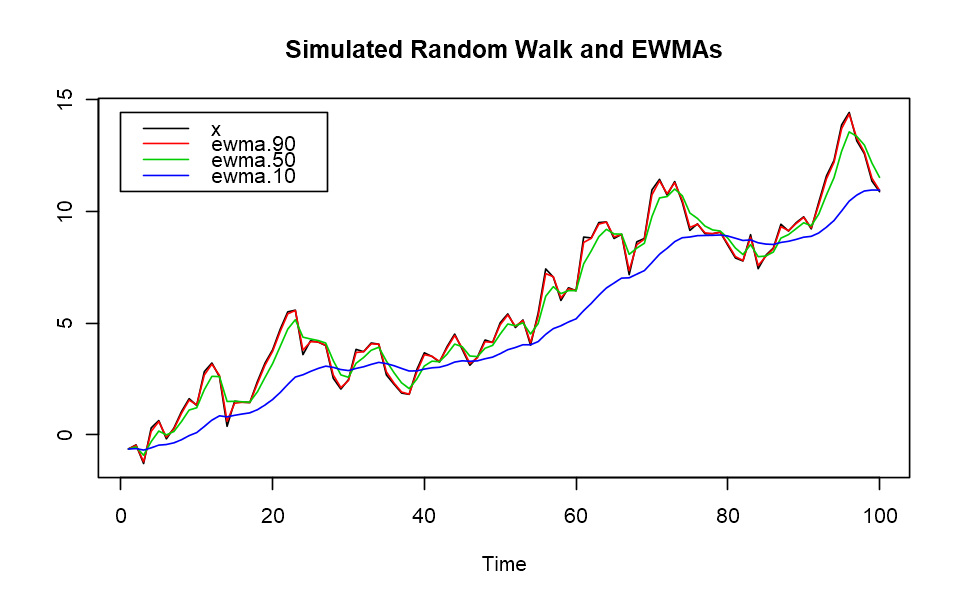

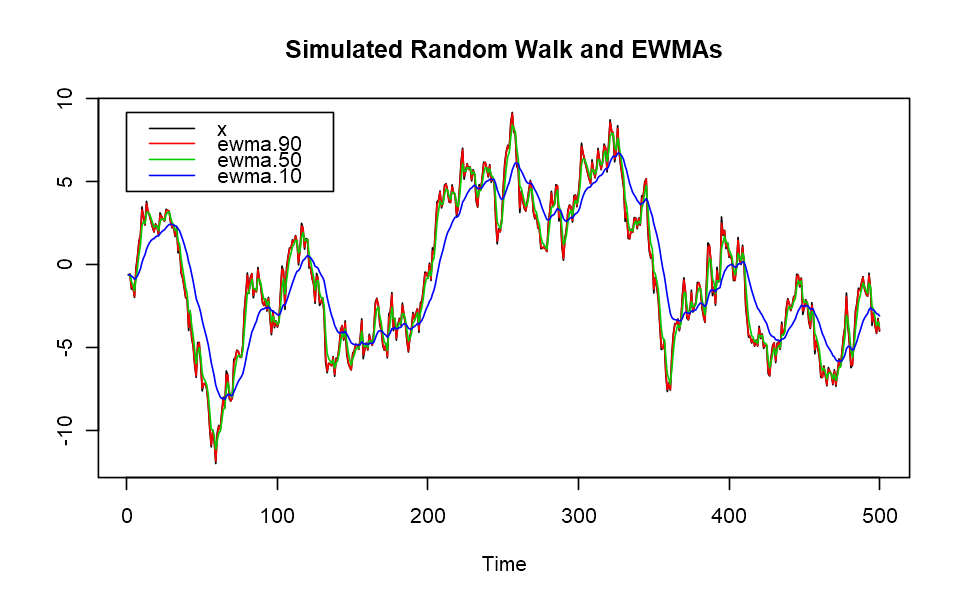

In [55]:
 set.seed(1)

 x=cumsum(rnorm(100))

library(repr)

options(repr.plot.width=8, repr.plot.height=5)

library(microbenchmark)
 x.ewma.90<-ewma(x,alpha=.90)
 x.ewma.50<-ewma(x,alpha=.50)
 x.ewma.10<-ewma(x,alpha=.10)
 ts.plot(ymat0<-cbind(x=x,
     ewma.90=x.ewma.90,
     ewma.50=x.ewma.50,
     ewma.10=x.ewma.10), col=c(1:4),
     main="Simulated Random Walk and EWMAs")



 legend(x=0, y=max(as.vector(ymat0)),
     legend=dimnames(ymat0)[[2]],
     col=c(1:4),
     lty=rep(1,times=4))

 x=cumsum(rnorm(500))

options(repr.plot.width=8, repr.plot.height=5)

library(microbenchmark)
 x.ewma.90<-ewma(x,alpha=.90)
 x.ewma.50<-ewma(x,alpha=.50)
 x.ewma.10<-ewma(x,alpha=.10)
 ts.plot(ymat0<-cbind(x=x,
     ewma.90=x.ewma.90,
     ewma.50=x.ewma.50,
     ewma.10=x.ewma.10), col=c(1:4),
     main="Simulated Random Walk and EWMAs")



 legend(x=0, y=max(as.vector(ymat0)),
     legend=dimnames(ymat0)[[2]],
     col=c(1:4),
     lty=rep(1,times=4))


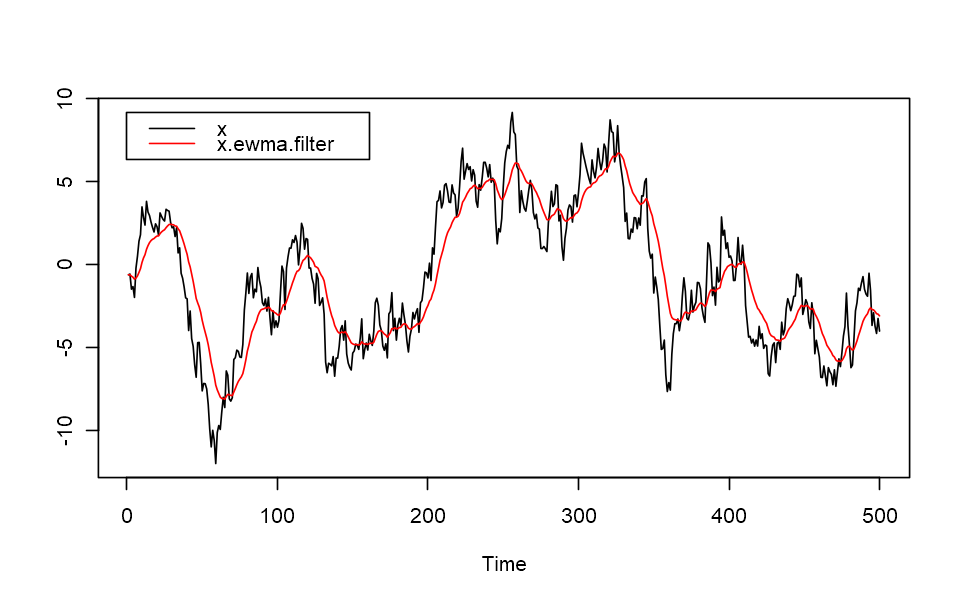

In [56]:
ewma.filter<-function(x,alpha){
result<-c(filter(x*alpha, 1-alpha,method="recursive", init=x[1]))
return(result)
}

ts.plot(ymat<-cbind(
 x=x,
x.ewma.filter=ewma.filter(x,0.1)),
col=c(1,2))
legend(x=0,
y=max(as.vector(ymat)),
legend=dimnames(ymat)[[2]],
col=c(1:ncol(ymat)),
lty=rep(1,times=ncol(ymat)))
options(repr.plot.width=8, repr.plot.height=4.5)



In [1]:
all.equal(ewma.filter(x,alpha=.9), ewma(x,alpha=.9))

ERROR: Error in ewma.filter(x, alpha = 0.9): could not find function "ewma.filter"


Unit: microseconds
                        expr    min     lq     mean   median       uq     max
        ewma(x, alpha = 0.9) 64.912 70.747 115.3611 125.4475 138.3935 209.323
 ewma.filter(x, alpha = 0.9) 49.231 56.525  87.2923  84.6045  93.3565 313.254
 neval
   100
   100


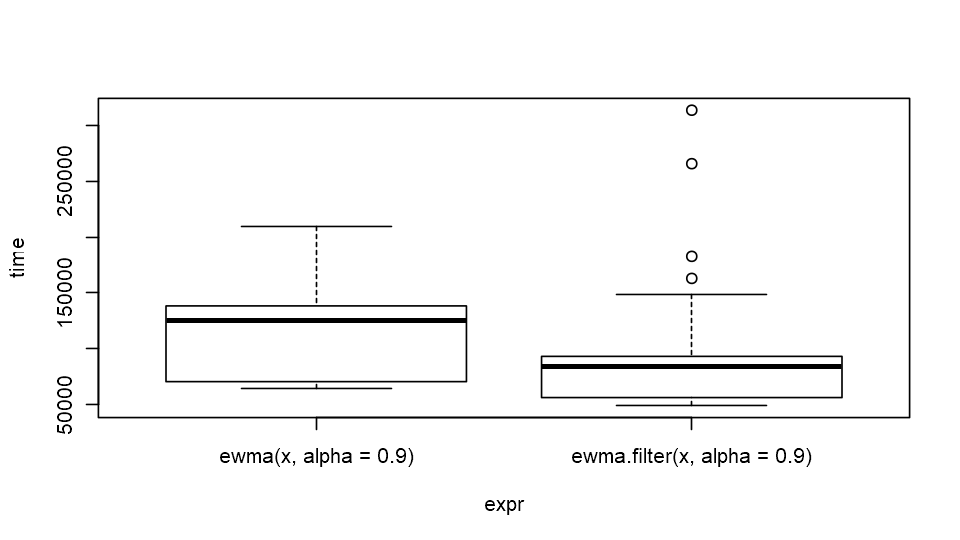

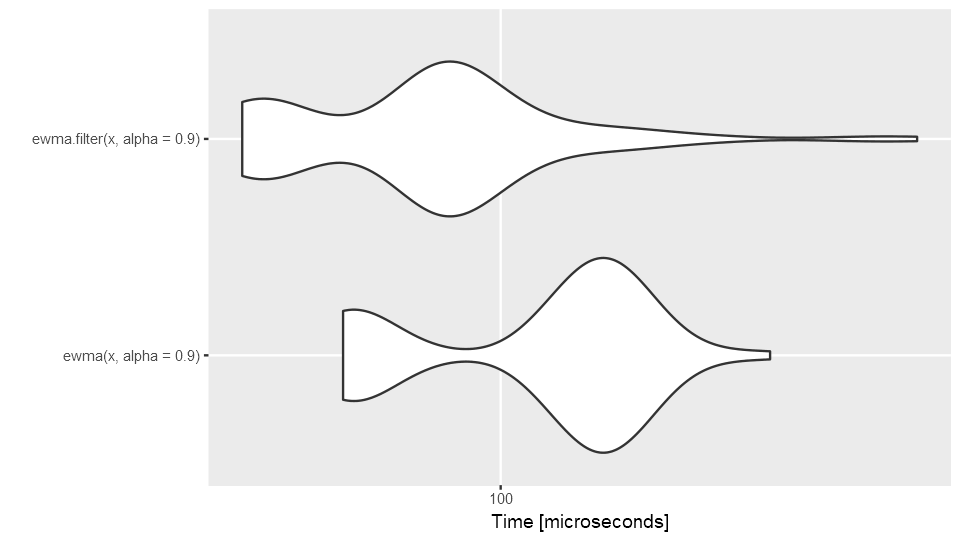

In [59]:
microbm.1<-microbenchmark::microbenchmark(ewma(x,alpha=.9), ewma.filter(x,alpha=.9))
# Read the help function for microbenchmark, and
# print out/plot the results:
print(microbm.1)
plot(microbm.1)
library(ggplot2)
autoplot(microbm.1)

In [61]:
ewma.cmpfun <- compiler::cmpfun(function(x, alpha) {
n <- length(x)
s <- rep(NA,n)
s[1] <- x[1]
if (n > 1) {
for (i in 2:n) {
s[i] <- alpha * x[i] + (1 - alpha) * s[i-1]
}
}
return(s)
})


In [63]:
all.equal(ewma(x,alpha=.9), ewma.cmpfun(x,alpha=.9))
all.equal(ewma.filter(x,alpha=.9), ewma.cmpfun(x,alpha=.9))

[1] TRUE

[1] TRUE

In [64]:
microbm.2<-microbenchmark::microbenchmark(
ewma(x,alpha=.9),
 ewma.filter(x,alpha=.9),
 ewma.cmpfun(x,alpha=.0))

Unit: microseconds
                        expr    min     lq     mean  median      uq     max
        ewma(x, alpha = 0.9) 60.536 61.266 72.09637 62.1770 68.9235 264.752
 ewma.filter(x, alpha = 0.9) 47.408 49.049 71.64050 50.8725 60.1715 268.035
   ewma.cmpfun(x, alpha = 0) 60.536 61.265 73.44931 61.9950 70.7465 196.194
 neval
   100
   100
   100


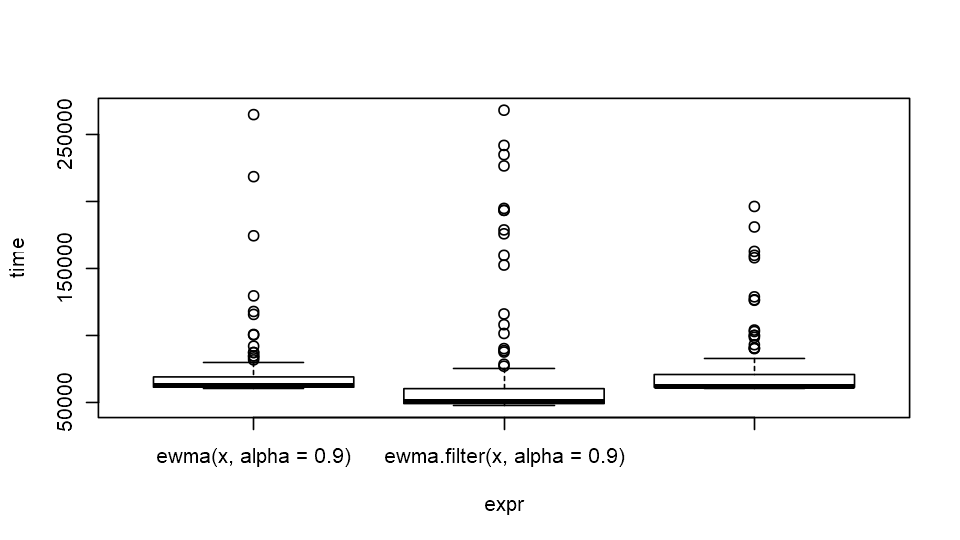

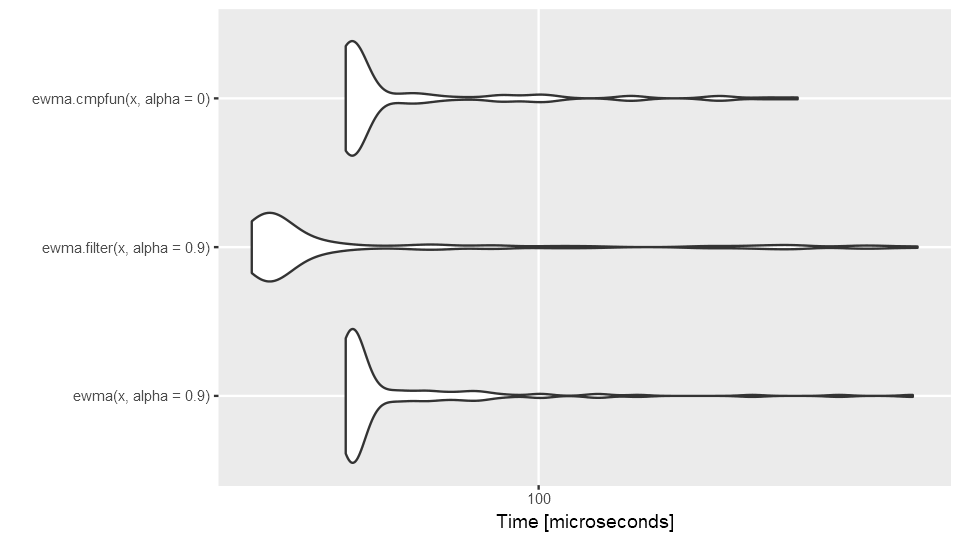

In [67]:
print(microbm.2)
plot(microbm.2)
library(ggplot2)
autoplot(microbm.2)



# Problem 4

## R basics

R is a free, open source programming language very commonly used for data analysis. It has a very large set of packages and build in tools that are very useful for analyzing and visualizing data. 

## Common operators and functions

In addition to most mathematical operators ("+", "-", "*", "^", "/") used to perform simple operations, a very common operator in r is the assignment operator, "<-" in order to assign values to variables, but the same can be done with the equals sign. The pound sign ("#") declares anything that follows it as a comment. Furthermore, the logical operators used are ">" for "greater that", ">=" for "greater than or equal to", "==" for "equal to" and "!=" for "not equal to".

One very important function is the help function, that is "help(f)". This function gives information on the function passed as the argument. Furthermore, one of the strong points of R is its ability to install and include extra packages. In order to do that, one must use "install.packages(x)" to install the package x and after that we have to use "libraries(x)" in order to include the package. 

Other useful functions include:

* abs(x) - absolute value
* c(a,b,c) - combine arguments in a vector
* cat(x) - prints arguments
* cbind(x) - combines vectors by rows/columns
* length(x) - number of elements in x
* seq(a,b,c) - makes a squence from a to b in steps of c
* rev(x) - prints x in revers
* sort(x) - sorts the vector x
* unique(x) - removes duplicates from x
* getwd() - prints current working directory
* setwd() - set woring directory
* sin(), cos(), tan(), acos(), atan(), asin() - trigonometric functions 
* plot(x) - generate plot of x
* hist(x) - generate histogram of x
* lm() - fit linear model
* sd() - standard deviation
* mean(x) - mean of x
* median(x) - median of x
* var(x) - variance of x
* qqplot() - quantile-quantile plot
* head(x) - show the first few rows of a dataframe
* ls() - prints all the current objects in memory

In order to define custom functions, the following syntax is used:
```
myfunction <- function(arg1, arg2, ... ){
statements
return(object)
}
```



## Data (types and importing)

Some of the main datatypes in R are:
1. integers - integer values
2. numerics - general number datatype (decimal)
3. complex - complex numbers with real and imaginary parts
4. logicals - boolean variables
5. Characters - string characters
6. Vectors - arrays of numbers
7. lists - like vectors but can have many different datatypes
8. matrices - two dimensional vectors
9. data frame - table like object with headers; each column contains objects of a certain type

In order to import data from a csv file one can use the function read.csv(x). This function imports the data from the csv file into a dataframe variable. 


## Environments

The most straightforward way to use R, is to just type commands into a terminal running R, or write whole scripts and then run them. RStudio is an integrated development environment (IDE) for R, which includes a console, syntax-highlighting editor that supports direct code execution, as well as tools for plotting, history, debugging and workspace management. RStudio is available on all major platforms and very easy to download.

An alternative that provides a lot of ease of use is runing R on Jupyter. Jupyter is an open-source web application that allows one to create and share documents that contain live code, equations, visualizations and narrative text. It was initially created for Python, but it can easily be used with R. A Jupyter Notebook contains multiple cells, each of which contains code that can be run independently of each other. Cells can also be used to display text written in markdown format in order to include text or equations on the same document as the code. 

In order to install Jupyter with R, one must first download jupyter, by downloading the Anaconda suite which is free for any platform. After this, there are two more steps needed. First one should type the following into an R terminal :

``` 
install.packages(c('repr', 'IRdisplay', 'evaluate', 'crayon', 'pbdZMQ', 'devtools', 'uuid', 'digest'))
devtools::install_github('IRkernel/IRkernel')
```

And secondly, input this command: ```IRkernel::installspec()``` in order to make available the installation to Jupyter. After that one can use Jupyter in order to perform all calulations necessary and include text and equations like on this submission.
